### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

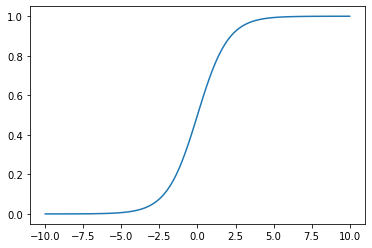

In [13]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(70)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+2):
        z = np.dot(W, X)
        
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        grad = alpha * (1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations / 10) == 1:
            print(i, W, err)
        
        W -= grad
            
    return W

In [15]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

1 [ 0.85099741  0.17775492 -0.85303971 -0.44389968] 0.9697836386909907
501 [ 0.84461371  0.16338614 -0.8415948  -0.44079457] 0.9620170898870658
1001 [ 0.83862305  0.15101492 -0.82991284 -0.43684485] 0.9551909479965888
1501 [ 0.83295271  0.14022955 -0.81806367 -0.43222598] 0.9489828376187832
2001 [ 0.82754548  0.13071091 -0.80610033 -0.42707472] 0.9431903991496398
2501 [ 0.82235612  0.12221013 -0.79406339 -0.42149834] 0.9376852832117729
3001 [ 0.81734859  0.11453164 -0.78198414 -0.41558162] 0.9323852519113134
3501 [ 0.81249403  0.10752073 -0.76988695 -0.40939199] 0.9272371230210086
4001 [ 0.80776921  0.10105416 -0.75779094 -0.40298345] 0.9222062226387132
4501 [ 0.80315533  0.09503327 -0.74571123 -0.39639946] 0.9172697821128761
5001 [ 0.79863711  0.08937862 -0.73365982 -0.38967514] 0.9124127552276562


## ДЗ

### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [16]:
def calc_logloss1(y, y_pred):

    y_pred = np.where(y_pred *(1 - y_pred) == 0, np.abs(y_pred - 10e-9), y_pred)

    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [17]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0])
y_pred2 = np.array([0, 1])
calc_logloss1(y1, y_pred1), calc_logloss1(y1, y_pred2)

(1.0000000100247594e-08, 18.420680741439988)

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [18]:
# в eval_model  использую мой calc_logloss1, чтобы избежать ошибок с y_pred~~0:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(70)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+2):
        z = np.dot(W, X)
        
        y_pred = sigmoid(z)
        err = calc_logloss1(y, y_pred)
        
        grad = alpha * (1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations / 10) < 7:
            print(i, W, err)
            print('---grad:', grad.round(2))
            print('---prob', y_pred.round(2))
        
        W -= grad
            
    return W

In [19]:
W = eval_model(X_st, y, iterations=315, alpha=4000) 

# получился какой-то очень хаотичный спуск, но супер быстро.  
# Градиент поначалу скачет, потом резко становится близким к 0 вместе с logloss и там стабилизируется.см. ниже после 221 шага!
# Не знаю, насколько это корректно. Похоже не на итерации, на рандомный поиск )). 
# Не уверен, что процедура сходится статистически значимо. 
# Вроде у Энга было, что логлосс не является глобально выпуклой и имеет серию локальных минимумов, возможно 
# эти скачки позволяют в глобальный минимум запрыгнуть...

# Скорость зависит от рандомной инициализации:
# random.seed = 45: 256 [-23823.28578812  -3085.67164194  -5956.43811516  20851.52257769] 9.000000090222834e-09
# random.seed = 47: 256 [-23909.77399145  -3231.55429043  -5388.57478411  21812.77384799] 8.000000080198074e-09
# random.seed = 40: 511 [-24151.22320108  -3467.84817277  -5435.51514846  22175.95418217] 1.3409539231617882e-07

1 [ 0.85099741  0.17775492 -0.85303971 -0.44389968] 0.9697836386909907
---grad: [ 528.7  1242.48 -903.85 -209.07]
---prob [0.81 0.74 0.67 0.88 0.42 0.67 0.37 0.38 0.82 0.57]
2 [ -527.84877958 -1242.2999491    902.99869509   208.62926631] 9.210340375976184
---grad: [-2000.   -5200.    -226.85 -4000.  ]
---prob [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1472.15122042 3957.7000509  1129.85104421 4208.62926631] 9.210340374463803
---grad: [2000.   6800.   -226.85 2800.  ]
---prob [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
4 [ -527.84877958 -2842.2999491   1356.70339334  1408.62926631] 11.052408449868945
---grad: [-1600.   -5200.    -371.21 -3600.  ]
---prob [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5 [1072.15122042 2357.7000509  1727.91632827 5008.62926631] 9.210340374463803
---grad: [2000.   6800.   -226.85 2800.  ]
---prob [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
6 [ -927.84877958 -4442.2999491   1954.7686774   2208.62926631] 11.052408449868945
---grad: [-1600.   -5200.    -371.21 -3600.  ]
---prob [0. 0. 0. 0. 0. 1. 0. 0. 0.

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [20]:
def calc_pred_proba(X, W):
    return sigmoid(W @ X)

In [21]:
calc_pred_proba(X_st, W)

array([2.22356227e-68, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 3.62253343e-82, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [22]:
def calc_pred(X, W):
    return (sigmoid(W @ X) > 0.5).astype('int')

In [23]:
calc_pred(X_st, W)

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [24]:
def my_metrics():
    TP = ( (calc_pred(X_st, W) == 1) & (y == 1)).astype('int').sum()
    FP = ( (calc_pred(X_st, W) == 1) & (y == 0)).astype('int').sum()
    TN = ( (calc_pred(X_st, W) == 0) & (y == 0)).astype('int').sum()
    FN = ( (calc_pred(X_st, W) == 0) & (y == 1)).astype('int').sum() 
    
    accuracy = ((calc_pred(X_st, W) == y).astype('int')).mean()
    confus_matr = [[TP, FP],
                  [TN, FN]]
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    F1 = 2 * precision * recall / (precision + recall)
    
    print(f'accuracy  {accuracy}')
    print(f'confusion matrix {confus_matr}')
    print(f'precision {precision}')
    print(f'recall {recall}')
    print(f'F1 {F1}')
    

In [25]:
my_metrics()

accuracy  1.0
confusion matrix [[5, 0], [5, 0]]
precision 1.0
recall 1.0
F1 1.0


### 6. Могла ли модель переобучиться? Почему?

очевидно переобучилась, очень большие коэффициенты W. Нужна регуляризация

### 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [26]:
def calc_logloss_l1(y, y_pred, w, lambd):
    
    y_pred = np.where(y_pred *(1 - y_pred) == 0, np.abs(y_pred - 10e-9), y_pred)
    
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred)) + lambd * sum(np.abs(w))
    err = np.sum(err)
    return err

In [27]:
def calc_logloss_l2(y, y_pred, w, lambd):
    
    y_pred = np.where(y_pred *(1 - y_pred) == 0, np.abs(y_pred - 10e-9), y_pred)
    
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred)) + lambd * sum(w * w)
    err = np.sum(err)
    return err

In [28]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambd=1):
    np.random.seed(70)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+2):
        z = np.dot(W, X)
        
        y_pred = sigmoid(z)
        err = calc_logloss_l1(y, y_pred, W, lambd)
        
        grad = alpha * (1/n * np.dot((y_pred - y), X.T) + lambd * (np.sign(W)))
        
        if i % (iterations / 10) == 1:
            print(i, W, err)
            #print('---grad:', grad.round(2))
            #print('---prob', y_pred.round(2))
        
        W -= grad
            
    return W

In [29]:
W = eval_model_l1(X_st, y, iterations=900, alpha=0.9, lambd=0.02) 

1 [ 0.85099741  0.17775492 -0.85303971 -0.44389968] 1.0162974731357999
91 [-1.22532394 -0.75968891  0.6419791   2.51717604] 0.5746462565457006
181 [-2.18759917 -0.72399987  0.17341486  2.93758044] 0.5402961277435887
271 [-2.68390078 -0.73968073  0.03038346  3.19703889] 0.5272579101100094
361 [-2.82452387 -0.75755146  0.03411397  3.27170161] 0.522876239398357
451 [-2.85711548 -0.76328689  0.05468975  3.29818103] 0.5238990813501256
541 [-2.87625483 -0.762863    0.03583094  3.29423053] 0.5212441088757023
631 [-2.88048377 -0.76295739  0.03497938  3.29619706] 0.5211684441083613
721 [-2.87299586 -0.76772689  0.0546856   3.30623894] 0.5227278808423257
811 [-2.87402524 -0.76373652  0.04888053  3.30690151] 0.5235301077291629
901 [-2.87838753 -0.75872664  0.04341208  3.30137879] 0.5236379193154511


In [30]:
calc_pred_proba(X_st, W)

array([0.31833984, 0.31734158, 0.80134005, 0.00783083, 0.58881005,
       0.56247427, 0.81760836, 0.02636697, 0.31858967, 0.80042226])

In [31]:
calc_pred(X_st, W)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [32]:
my_metrics()

accuracy  0.8
confusion matrix [[4, 1], [4, 1]]
precision 0.8
recall 0.8
F1 0.8000000000000002


In [33]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambd=1):
    np.random.seed(70)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+2):
        z = np.dot(W, X)
        
        y_pred = sigmoid(z)
        err = calc_logloss_l2(y, y_pred, W, lambd)
        
        grad = alpha * (1/n * np.dot((y_pred - y), X.T) + lambd * (W))
        
        if i % (iterations / 10) == 1:
            print(i, W, err)
            #print('---grad:', grad.round(2))
            #print('---prob', y_pred.round(2))
        
        W -= grad
            
    return W

In [34]:
W = eval_model_l2(X_st, y, iterations=900, alpha=0.9, lambd=0.01) 

1 [ 0.85099741  0.17775492 -0.85303971 -0.44389968] 0.986588809446992
91 [-1.32085824 -0.8141128   0.74507677  2.55774959] 0.5429644904720489
181 [-1.89362793 -0.78337874  0.4574037   2.82309776] 0.5473921363391134
271 [-2.05748017 -0.77519572  0.37841918  2.89463535] 0.549936124386587
361 [-2.10365561 -0.77315641  0.35630242  2.91502833] 0.5507964810802898
451 [-2.11667876 -0.77258862  0.35007502  2.92079482] 0.5510546779979679
541 [-2.12035296 -0.77242912  0.34831907  2.92242268] 0.5511286894793126
631 [-2.12138962 -0.77238417  0.34782371  2.92288206] 0.5511496644028082
721 [-2.12168211 -0.77237149  0.34768395  2.92301167] 0.5511555898827053
811 [-2.12176464 -0.77236792  0.34764452  2.92304825] 0.5511572623553216
901 [-2.12178792 -0.77236691  0.34763339  2.92305857] 0.5511577342936376


In [35]:
calc_pred(X_st, W)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [36]:
my_metrics()

accuracy  0.8
confusion matrix [[4, 1], [4, 1]]
precision 0.8
recall 0.8
F1 0.8000000000000002
